In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Ignore seaborn warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Reading data into pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/dataset/creditcard.csv")

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape

(284807, 31)

In [7]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

As we can see the data is unbalanced

In [8]:
#Exploratory Data Analysis

In [9]:
# Checking for missing values
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# Since there is only single empty row we can drop it
data.dropna(axis=0, inplace=True)
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
data["Time"].nunique()

124592

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
# No categorical columns, only numerical columns present in the data

In [14]:
# Lets visualize the data

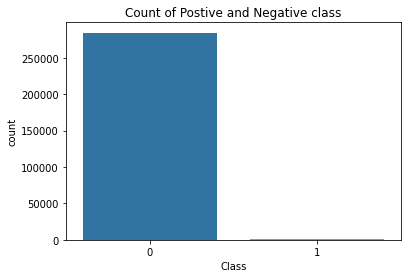

In [15]:
plt.title("Count of Postive and Negative class")
sns.countplot(x=data['Class'])
plt.show()

Counter({0: 284315, 1: 492})


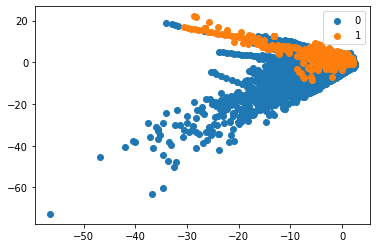

In [16]:
# Data distribution of Both classes
from collections import Counter
y = data['Class']
counter = Counter(y)
print(counter)

for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(data.iloc[row_ix, 1], data.iloc[row_ix, 2], label=str(label))
plt.legend()
plt.show()

In [17]:
# percentage of positive and negative samples in the data
positive_percentage = data[data['Class'] == 1.0].shape[0] / data.shape[0] * 100
negative_percentage = data[data['Class'] == 0.0].shape[0] / data.shape[0] * 100
print(f"Percentage of Postive samples in the data: {positive_percentage}")
print(f"Percentage of Negative samples in the data: {negative_percentage}")

Percentage of Postive samples in the data: 0.1727485630620034
Percentage of Negative samples in the data: 99.82725143693798


In [18]:
# It is clear that the data is imbalanced, almost 99% of the data consist of negative sample.
# If we did'nt handle the imbalance in the data, it will lead to overfitting problem which will result in poor predictions for new data.

In [19]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [20]:
# Visualizing the relations of Time, Amount and Class

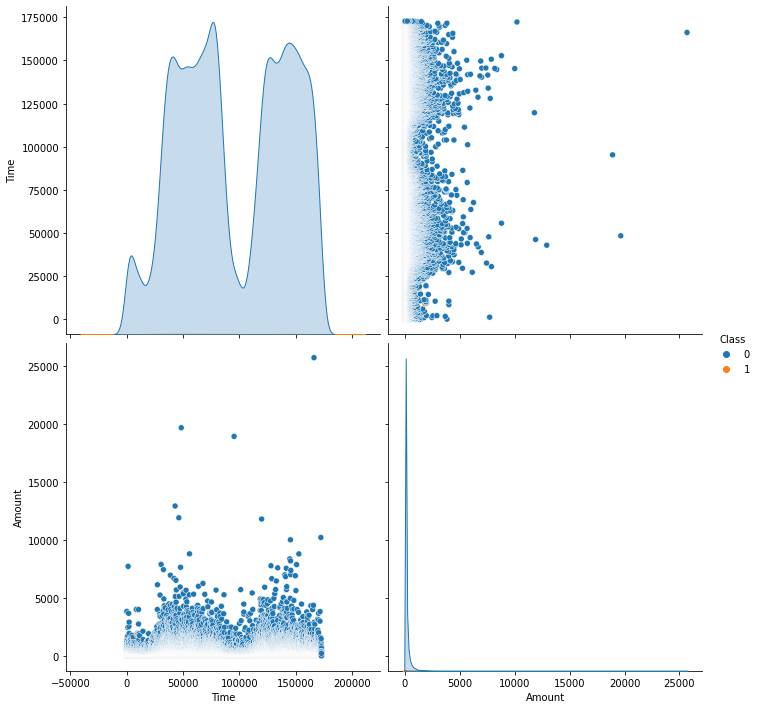

In [21]:
df = data[['Time', 'Amount', 'Class']]
sns.pairplot(data=df, hue="Class", size=5)

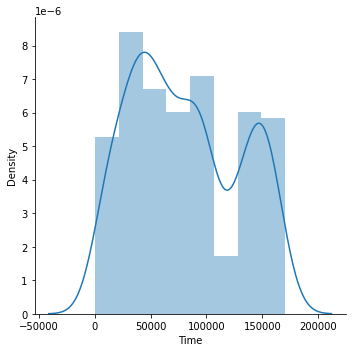

In [22]:
# Relation between Fraudulent transaction and time
sns.FacetGrid(df[df['Class'] == 1], hue="Class", size=5).map(sns.distplot, "Time")
plt.show()

In [23]:
# from this plot it is clear that, fraudulent transactions happens constantly with time, which means fraudulent transaction happens on a regular interval.

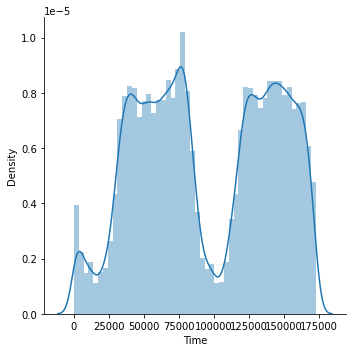

In [24]:
# Relation between legitimate transaction and time
sns.FacetGrid(df[df['Class'] == 0], hue="Class", size=5).map(sns.distplot, "Time")
plt.show()

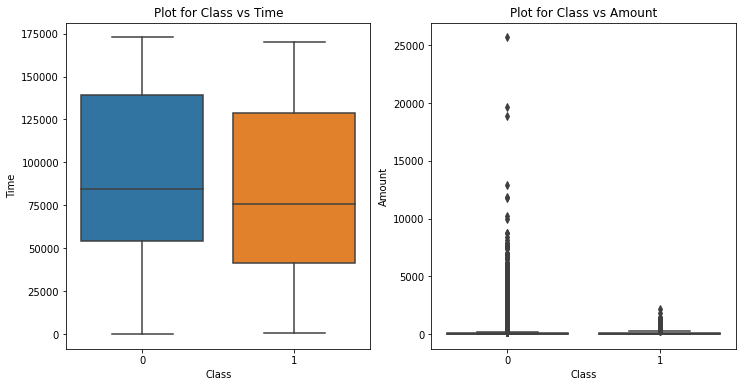

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Plot for Class vs Time")
sns.boxplot(data=df, x="Class", y="Time")
plt.subplot(1, 2, 2)
plt.title("Plot for Class vs Amount")
sns.boxplot(data=df, x="Class", y="Amount")
plt.show()

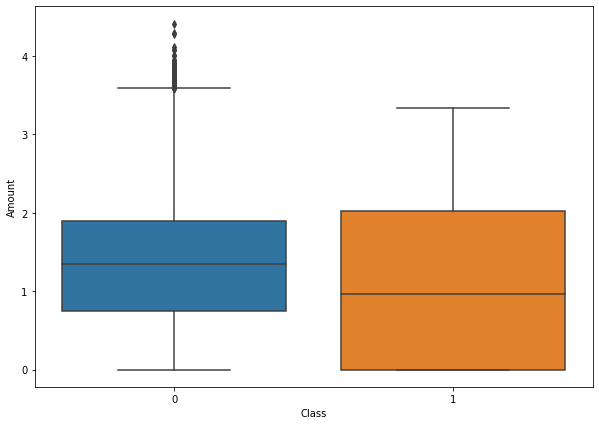

In [26]:
# Amount is not well distributed for both class, so we can transform the amount column
# Plot for Class vs Amount after log transformation
amount_log = np.log10(data['Amount'].clip(lower=1.0))
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x="Class", y=amount_log)
plt.show()

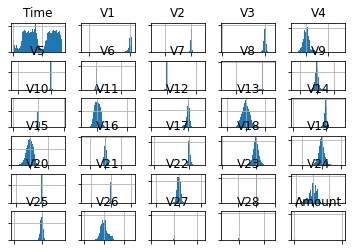

In [28]:
df = data.drop('Class', axis=1)
ax = df.hist(bins=100)
# disable axis labels to avoid the clutter
for axis in ax.flatten():
 axis.set_xticklabels([])
 axis.set_yticklabels([])
# show the plot
plt.show()

In [29]:
### Normalising feature Amount (standard deviation) due to large variance
# And dropping amount and time column from the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['scaled_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data.drop(['Time', 'Amount'], axis=1, inplace=True)

In [30]:
# from the above visualization we can see that fraud transaction does exceed the amount 2000 and it is evenly distributed with time

In [31]:
### Preprocessing

In [32]:
### Handling imbalance of the data

In [33]:
# As per the data we need to perform oversampling

In [34]:
#! pip install table_evaluator

In [35]:
from collections import Counter
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot

def sample_data(pipeline, data):
  """ 
    This function will perform specified sampling and plots scatter plot describing the distribution of each class
    inputs: pipeline (oversampling, undersampling)
    Returns: sampled data

  """

  X, y = data.drop('Class', axis=1), data['Class']
  # summarize class distribution
  counter = Counter(y)
  print(counter)
  # transform the dataset
  smote = SMOTE()
  X, y = pipeline.fit_resample(X, y)

  # summarize the new class distribution
  counter = Counter(y)
  print(counter)

  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    pyplot.scatter(X.iloc[row_ix, 0], X.iloc[row_ix, 1], label=str(label))
  pyplot.legend()
  pyplot.show()

  return X, y

# evalutate sampling
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
def evaluate_sampling(model, X, y, title):
  x_train, x_test, y_train, y_test = train_test_split(X,
                                                      y,
                                                      test_size=0.2,
                                                      stratify=y,
                                                      random_state=42)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  plt.figure(figsize=(5,5))
  plt.title(title)
  sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d")
  plt.show()
  precision, recall, f1_score, _ = precision_recall_fscore_support(y_test
                                                                   , y_pred, 
                                                                   average='macro')
  print('Precision: ', precision)
  print('Recall: ', recall)
  print('F1 score: ', f1_score)

Counter({0: 284315, 1: 492})
Counter({0: 71078, 1: 56863})


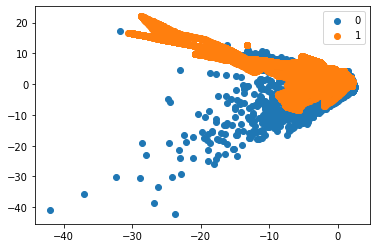

In [36]:
# preforming sampling using smote

over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.8)


steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_sampled_smote, y_sampled_smote = sample_data(pipeline, data)

Counter({0: 284315, 1: 492})
Counter({0: 71066, 1: 56853})


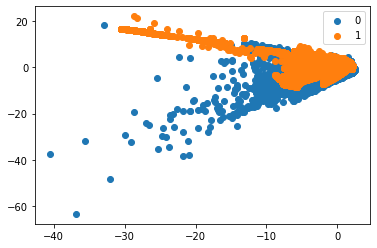

In [37]:
# sampling using ADASYN
over = ADASYN(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.8)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_sampled_adasyn, y_sampled_adasyn = sample_data(pipeline, data)

Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})


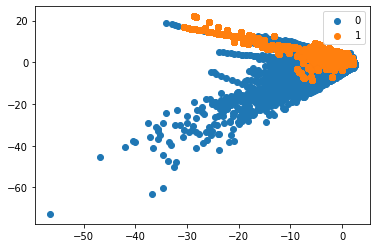

In [38]:
# sampling using RandomOverSampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
steps = [('ros', ros)]
pipeline = Pipeline(steps=steps)

X_sampled_ros, y_sampled_ros = sample_data(pipeline, data)

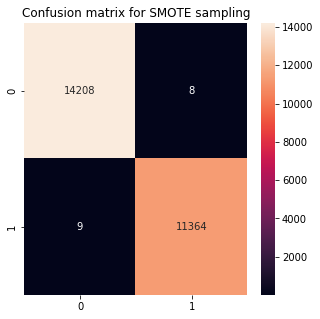

Precision:  0.9993317364083676
Recall:  0.9993229529346153
F1 score:  0.9993273430876134


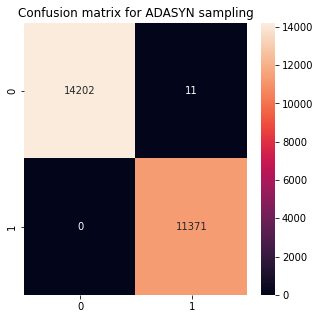

Precision:  0.9995167808820946
Recall:  0.9996130303243509
F1 score:  0.9995647138946719


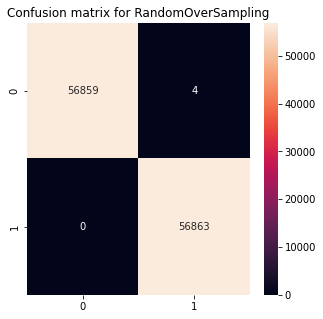

Precision:  0.9999648302178767
Recall:  0.9999648277438756
F1 score:  0.9999648277438322


In [39]:
# evaluation of sampled data on RandomForest model (without hyperparameter tuning)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# evaluating smote sampling

evaluate_sampling(model, 
                  X_sampled_smote, 
                  y_sampled_smote, 
                  title="Confusion matrix for SMOTE sampling")

# evaluating adasyn sampling
evaluate_sampling(model, 
                  X_sampled_adasyn, 
                  y_sampled_adasyn,
                  title="Confusion matrix for ADASYN sampling")

# evaluating RandomOverSampling
evaluate_sampling(model, 
                  X_sampled_ros, 
                  y_sampled_ros,
                  title="Confusion matrix for RandomOverSampling")



RandomOverSampling gives the best result compared to others (no false negatives)




In [40]:
ros_df = pd.concat([X_sampled_ros, y_sampled_ros], axis=1)

In [41]:
# Handling outliers using IQR method
Q1 = ros_df.quantile(0.25)
Q3 = ros_df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers based on IQR
updated_ros_df = ros_df[~((ros_df < (Q1 - 1.5 * IQR)) | (ros_df > (Q3 + 1.5 * IQR))).any(axis=1)]
X_updated_ros, y_updated_ros = updated_ros_df.drop('Class', axis=1), updated_ros_df['Class']
updated_ros_df['Class'].value_counts()

0    213679
1     93957
Name: Class, dtype: int64

In [110]:

pos_data = updated_ros_df[updated_ros_df['Class'] == 1].shape[0]
neg_data = updated_ros_df[updated_ros_df['Class'] == 0].shape[0]
pos_per = pos_data / len(updated_ros_df) * 100
neg_per = neg_data / len(updated_ros_df) * 100
print("Percentage of Positive samples: {0:.2f}%".format(pos_per))
print("Percentage of Negative samples: {0:.2f}%".format(neg_per))

Percentage of Positive samples: 30.54%
Percentage of Negative samples: 69.46%


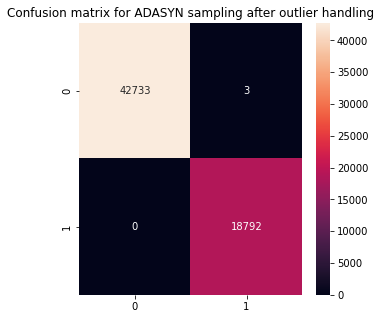

Precision:  0.9999201915403033
Recall:  0.9999649007862224
F1 score:  0.9999425423623145


In [43]:
# evalutating sampled data after outlier handling
evaluate_sampling(model, 
                  X_updated_ros, 
                  y_updated_ros,
                  title="Confusion matrix for ADASYN sampling after outlier handling")

In [119]:
# Taking a sample from the data which represent the entire data (stratified sampling)
sample_df = updated_ros_df.sample(frac=0.01)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,Class
193449,-0.471063,0.712298,1.245702,-0.105573,0.277658,-1.609680,0.930612,-0.279543,-0.518425,-0.615921,...,-0.134706,-0.397228,0.059173,0.941811,-0.448430,0.206070,0.066157,0.149244,-0.349271,0
293236,1.036639,0.407227,0.757706,3.161821,-0.568122,0.202181,-0.689804,0.411380,0.336769,-0.283731,...,-0.050108,0.123761,-0.132568,0.350231,0.507701,0.189621,0.061016,0.063141,-0.350191,1
83072,-0.874575,1.288753,0.465575,-0.596046,0.105244,-1.129826,0.942323,0.261274,-0.641879,-0.722446,...,-0.273482,-0.977562,0.088601,-0.023692,-0.219310,0.012095,0.142759,0.122671,-0.213696,0
205668,-0.746209,0.989980,-0.166106,-1.118001,2.058635,-1.366195,1.874519,-0.504768,-0.812876,-1.151930,...,0.003226,-0.047730,-0.639801,0.506604,1.187279,0.675475,-0.287645,-0.177103,-0.305652,0
63075,0.660038,-0.806519,1.057173,1.337464,-1.078050,0.443524,-0.492584,0.308944,0.561300,-0.093946,...,0.339559,0.648679,-0.229386,0.237469,0.285795,-0.279171,0.038633,0.059979,0.516994,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49724,1.142005,-0.781102,-0.509200,-0.537826,-0.637423,-1.100318,0.262577,-0.458696,-1.261256,0.638735,...,-0.329180,-0.803091,-0.197975,0.084588,0.442462,1.075614,-0.116161,0.021551,0.333042,0
222447,1.939387,-1.181825,-1.789337,-1.327464,0.450927,1.209843,-0.627492,0.333353,-0.641035,0.814447,...,0.065685,-0.022277,0.253845,-0.976378,-0.395958,-0.352002,-0.013460,-0.064092,0.030267,0
355406,1.189784,0.942289,0.082334,3.024050,0.412406,-0.214415,0.053558,-0.110353,0.883798,-0.554224,...,-0.502636,-1.047398,-0.056752,-0.340688,0.541235,-0.098300,-0.003041,0.049819,-0.338077,1
24483,1.326721,-0.602821,-0.737049,-0.911349,-0.137445,-0.355026,-0.005092,-0.211720,-1.388229,0.862979,...,-0.389354,-0.828973,-0.227043,-0.795105,0.537814,1.119212,-0.107201,-0.013188,-0.020868,0


In [118]:
pos_data = sample_df[sample_df['Class'] == 1].shape[0]
neg_data = sample_df[sample_df['Class'] == 0].shape[0]
pos_per = pos_data / len(sample_df) * 100
neg_per = neg_data / len(sample_df) * 100
print("Percentage of Positive samples: {0:.2f}%".format(pos_per))
print("Percentage of Negative samples: {0:.2f}%".format(neg_per))

Percentage of Positive samples: 31.11%
Percentage of Negative samples: 68.89%


In [112]:
# sample data represents the entire population

In [126]:
#cross validation & Hyper parameter tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def get_best_params(X, y):

  """This function will perform cross validation and hyperparameter tuning
     input: X, y
     returns: cross validation score and best parameters
  """
  models = {
      'knn': {
          'model': KNeighborsClassifier(),
          'params': {
              'n_neighbors': [5,10,15]
          }
      },
      'svc': {
          'model': SVC(gamma='auto'),
          'params': {
              'kernel': ['linear', 'rbf', 'poly'],
              'C': [5,10,15]
          }
      },

      'gnb': {
          'model': GaussianNB(),
          'params': {
              'var_smoothing': np.logspace(0,-9, num=100)
          }
      },

      'RF': {
          'model': RandomForestClassifier(),
          'params': {
              'n_estimators': [50,100]
          }
      }
  }
  scores = []
  for model_name, config in models.items():
      cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=41)
      gd = GridSearchCV(estimator=config['model'], param_grid=config['params'], n_jobs=1, cv=cv)
      gd.fit(X,y)
      scores.append({'model': model_name, 'cross_val_score': gd.best_score_, 'best_params': gd.best_params_})
  return pd.DataFrame(scores)

In [127]:
X_sample, y_sample = sample_df.drop('Class', axis=1), sample_df['Class']
get_best_params(X_sample, y_sample)

,model,cross_val_score,best_params
0,knn,0.973019,{'n_neighbors': 5}
1,svc,0.987323,"{'C': 15, 'kernel': 'rbf'}"
2,gnb,0.941487,{'var_smoothing': 0.03511191734215131}
3,RF,0.997076,{'n_estimators': 100}


In [ ]:
# RandomForestClassifier show better result

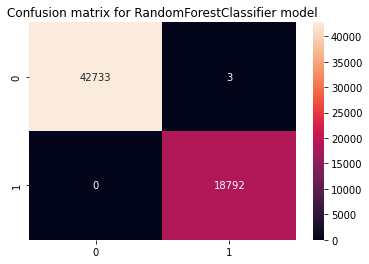

Precision:  0.9998403830806065
Recall:  1.0
F1 score:  0.9999201851704046


In [138]:
, precision_score

# Training RandomForestClassifier with tuned parameters
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(X_updated_ros, 
                                                    y_updated_ros,
                                                    test_size=0.2,
                                                    stratify=y_updated_ros,
                                                    shuffle=True,
                                                    random_state=42)
rf_model_ = RandomForestClassifier(n_estimators=100)
rf_model_.fit(X_train, y_train)
y_pred = rf_model_.predict(X_test)
plt.title('Confusion matrix for RandomForestClassifier model')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 score: ', f1score)

In [139]:
import joblib
joblib.dump(rf_model_, 'rf_model.pkl')

['rf_model.pkl']